In [1]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.8 MB/s eta 0:00:00


In [2]:
pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=14b1223d61ff9c95fa104377473b2461013d5d977089705787a0ccaa840f6a69
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [3]:
pip install gtts

In [4]:
from googletrans import Translator, constants
from pprint import pprint
from gtts import gTTS
from IPython.display import Audio
import matplotlib.pyplot as plt
import cv2
from pylab import rcParams
from IPython.display import Image
import easyocr

In [5]:
reader=easyocr.Reader(['en','hi'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

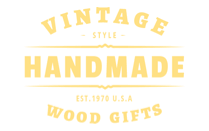

In [6]:
rcParams['figure.figsize'] = 8, 16
file_name = "/content/logo-5-color.png"
Image(file_name)

In [7]:
output = reader.readtext(file_name)
output

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[([[37, 1], [173, 1], [173, 39], [37, 39]], 'dNTA O:', 0.07072605922482461),
 ([[91, 29], [121, 29], [121, 43], [91, 43]], 't1Tu[', 0.07881707648115291),
 ([[19, 49], [191, 49], [191, 85], [19, 85]], 'HANDHADE', 0.6202942451518665),
 ([[73, 91], [137, 91], [137, 105], [73, 105]],
  'Ef imi Ila',
  0.07490955505722305),
 ([[45.05131670194949, 96.15395010584845],
   [106.94358336947336, 107.42093441912],
   [101.94868329805051, 131.84604989415155],
   [40.05641663052665, 120.57906558088]],
  'WoOD',
  0.27510321140289307),
 ([[103.71963120067105, 106.46355744080525],
   [162.76838676814745, 99.0657579338089],
   [165.28036879932895, 121.53644255919475],
   [106.23161323185255, 128.9342420661911]],
  'dIऐTI',
  0.034747229161935386)]

In [8]:
bounds = reader.readtext(file_name, add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-')
bounds

[([[28, 2], [74, 2], [74, 48], [28, 48]], '4', 0.23860607372093146),
 ([[36, 0], [191, 0], [191, 57], [36, 57]], 'TINTAOg_', 0.2251341859455029),
 ([[86, 24], [126, 24], [126, 48], [86, 48]], 'stt', 0.37010658593725726),
 ([[6, 36], [204, 36], [204, 98], [6, 98]], 'HANDMADE', 0.23412559957001577),
 ([[68, 86], [142, 86], [142, 110], [68, 110]], 'Eam a4', 0.1825296772759492),
 ([[96, 92], [166, 92], [166, 131], [96, 131]], '"arTs', 0.47159151731975474),
 ([[40.94035574373059, 83.82106723119178],
   [119.69911130385789, 104.91165023530664],
   [106.05964425626941, 144.1789327688082],
   [27.300888696142113, 123.08834976469336]],
  'woop ९',
  0.13588333623070828)]

In [10]:
import PIL
from PIL import ImageDraw
im=PIL.Image.open('/content/logo-5-color.png')

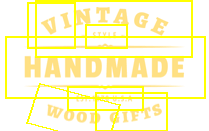

In [11]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [12]:
text_list = reader.readtext(file_name, add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-', detail=0)
text_list

['4', 'TINTAOg_', 'stt', 'HANDMADE', 'Eam a4', '"arTs', 'woop ९']

In [13]:
text_comb=' '.join(text_list)
text_comb

'4 TINTAOg_ stt HANDMADE Eam a4 "arTs woop ९'

In [15]:
translator= Translator()

In [16]:
print(translator.detect(text_comb))

Detected(lang=kn, confidence=0.7589133)


In [17]:
ta_tts=gTTS(text_comb,lang='en')
ta_tts.save('trans.mp3')
Audio('trans.mp3' , autoplay=True)

In [18]:
text_hi=translator.translate(text_comb, dest='hi')
print(text_hi.text)

4 TINTAOg_ stt हस्तनिर्मित ईम ए4 "आर्ट्स वूप 9


In [19]:
ta_tts=gTTS(text_hi.text,lang='hi')
ta_tts.save('trans.mp3')
Audio('trans.mp3' , autoplay=True)